# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [346]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Install Dependencies

In [347]:
%pip install numpy
%pip install pandas
%pip install plotly
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [348]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [349]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [350]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [351]:
df_data.shape

(4324, 9)

In [352]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [353]:
df_data.isna().values.any()

True

In [354]:
df_data.duplicated().values.any()

False

In [355]:
# More detailed duplicate check
duplicate_subset = ["Organisation", "Location", "Date", "Detail", "Price", "Mission_Status"]
df_data.duplicated(subset=duplicate_subset).values.any() # True

True

In [356]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


The data has NaN values, as well as a duplicate row. In addition to that, the first two columns are identical to the index, so they can be safely removed. In addition to that, the Date column is not a DateTime object, so that needs to be converted as well.

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [357]:
# Remove duplicates
df_data.drop_duplicates(subset=duplicate_subset, inplace=True)

In [358]:
# Remove junk columns
df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

## Descriptive Statistics

In [359]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

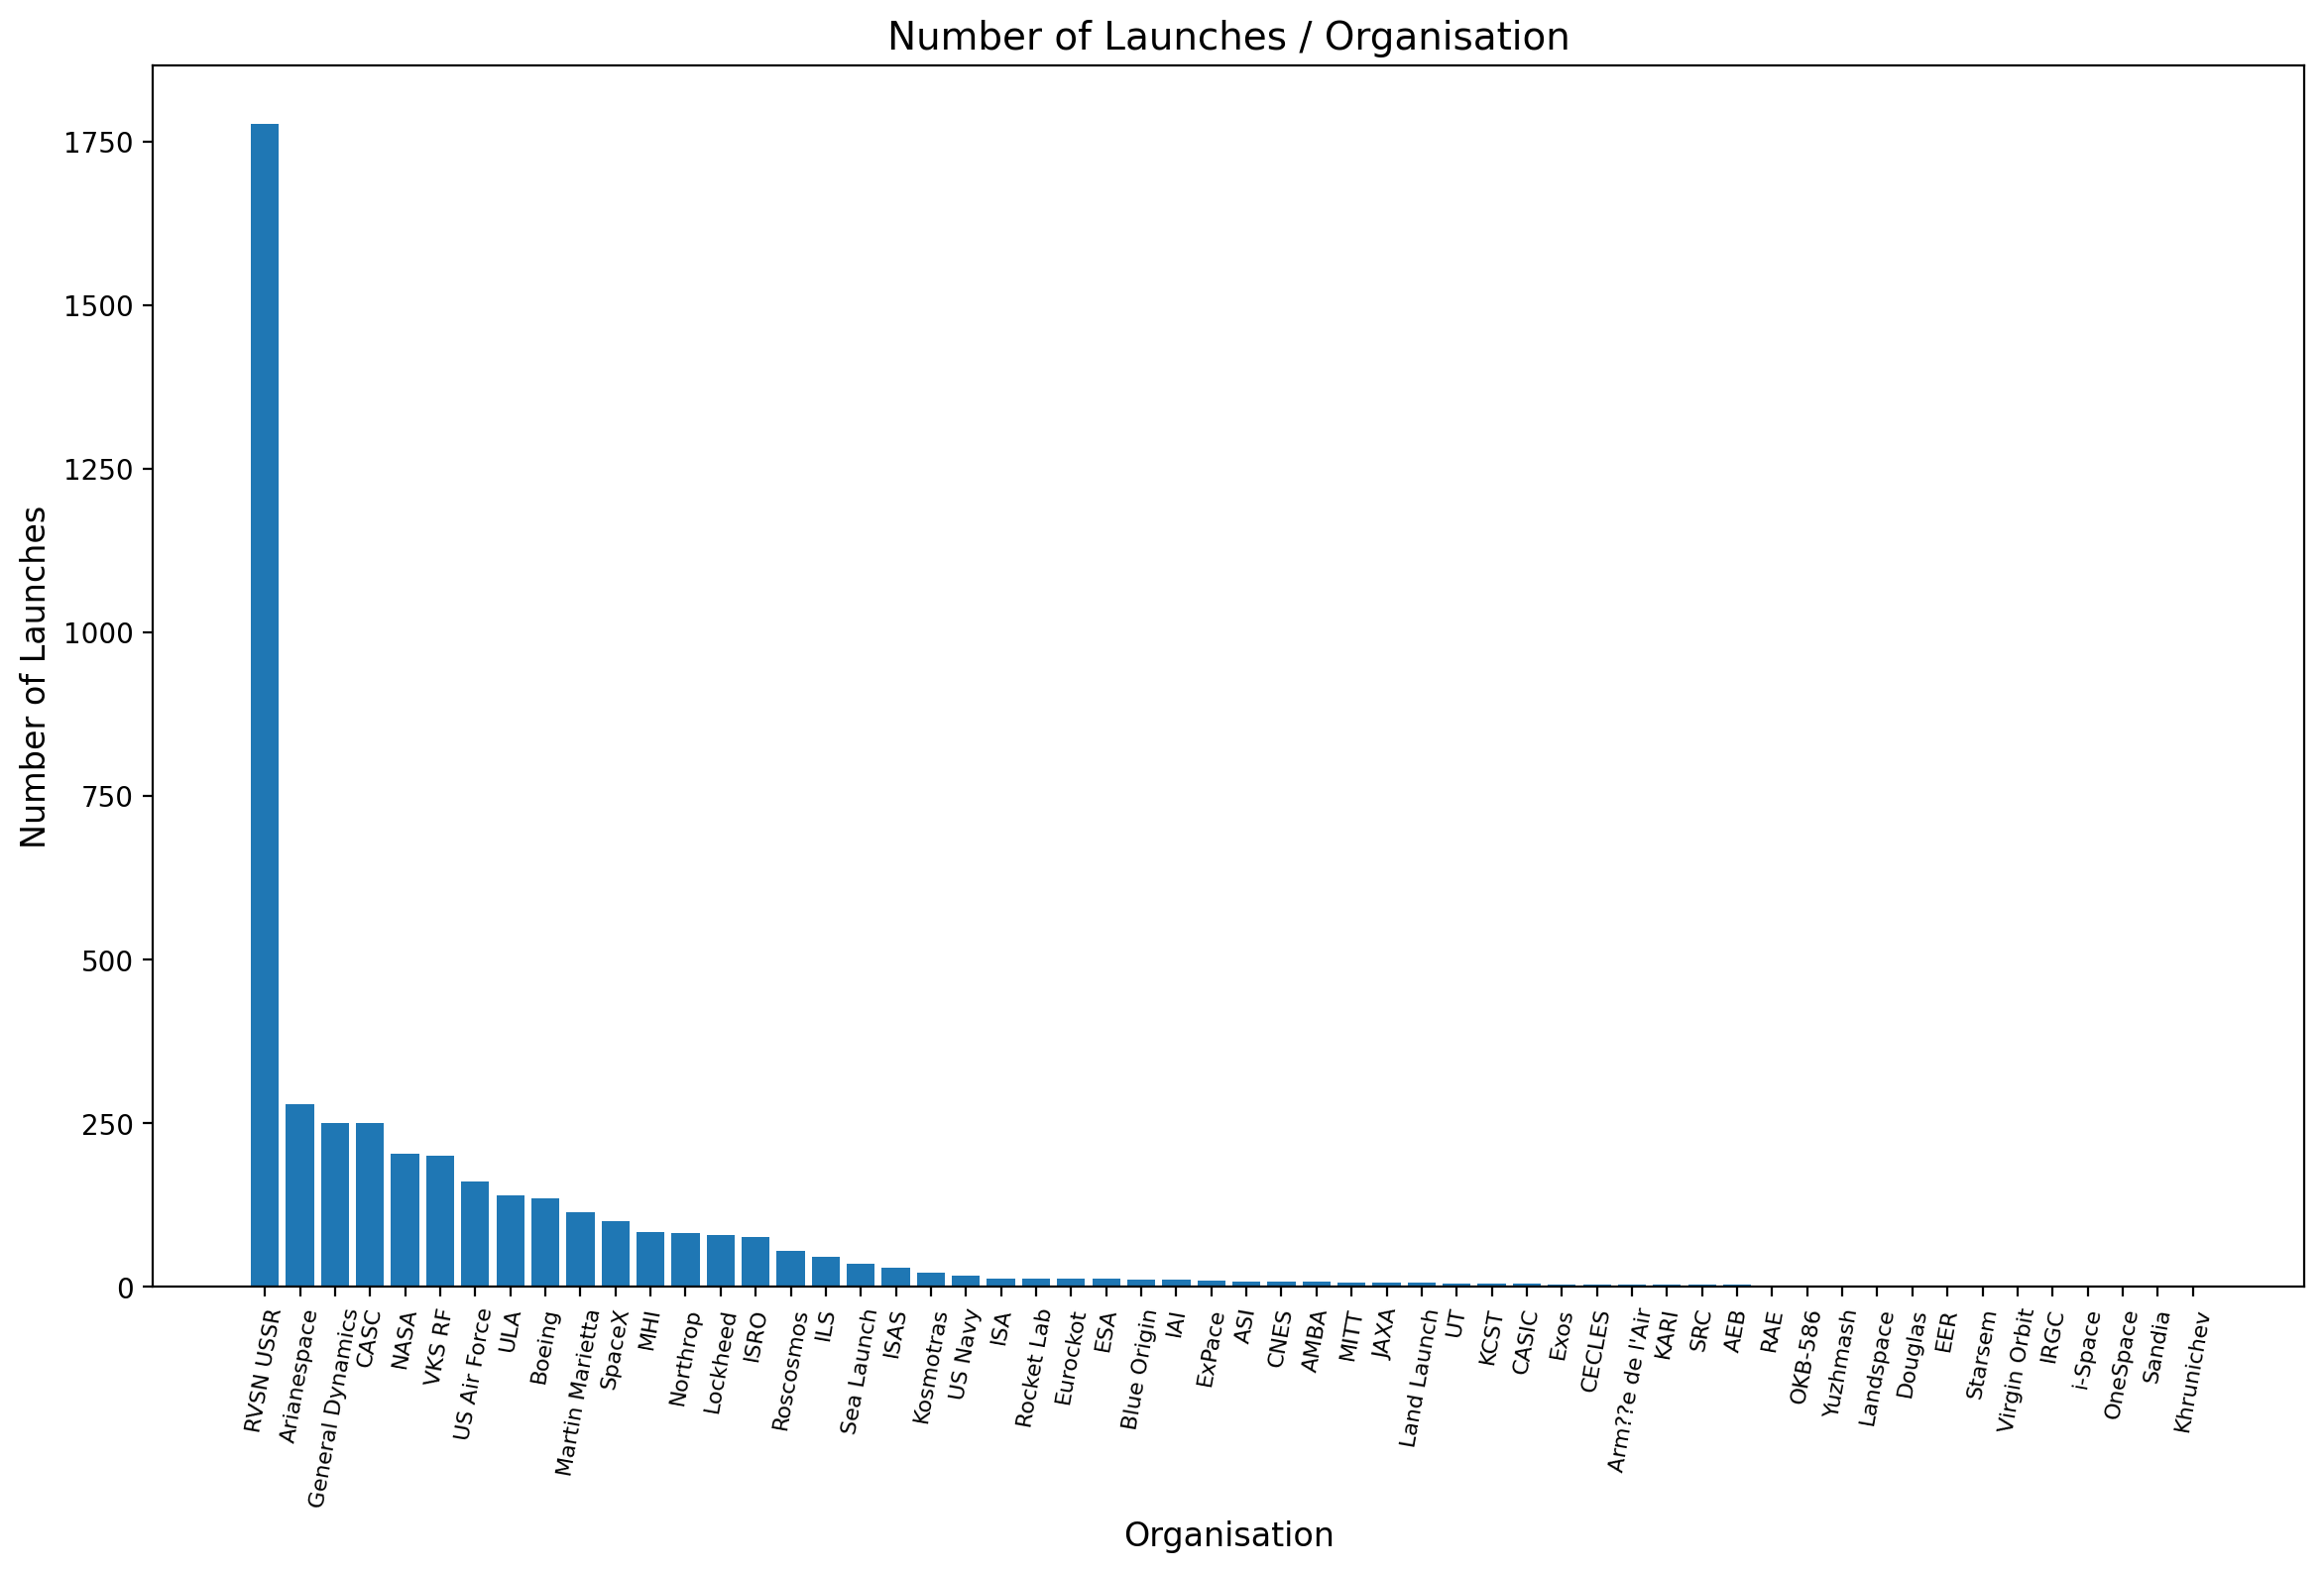

In [360]:
org_counts = df_data["Organisation"].value_counts()

plt.figure(figsize=(14, 8), dpi=200)
plt.title("Number of Launches / Organisation", fontsize=14)
plt.xlabel("Organisation", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.xticks(rotation=80, fontsize=8)

plt.bar(x=org_counts.index, height=org_counts.values)
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [361]:
# Clean up the Rocket_Status column
df_data["Rocket_Status"].value_counts()
df_data["Rocket_Status"] = df_data["Rocket_Status"].replace({"StatusRetired": "Retired", "StatusActive": "Active"})

([<matplotlib.patches.Wedge at 0x2ba898940>,
 [Text(-0.5967210042065626, -0.9240801064511192, 'Retired'),
  Text(0.5967210474658742, 0.9240800785165916, 'Active')],
 [Text(-0.32548418411267044, -0.5040436944278831, '81.7%'),
  Text(0.3254842077086586, 0.504043679190868, '18.3%')])

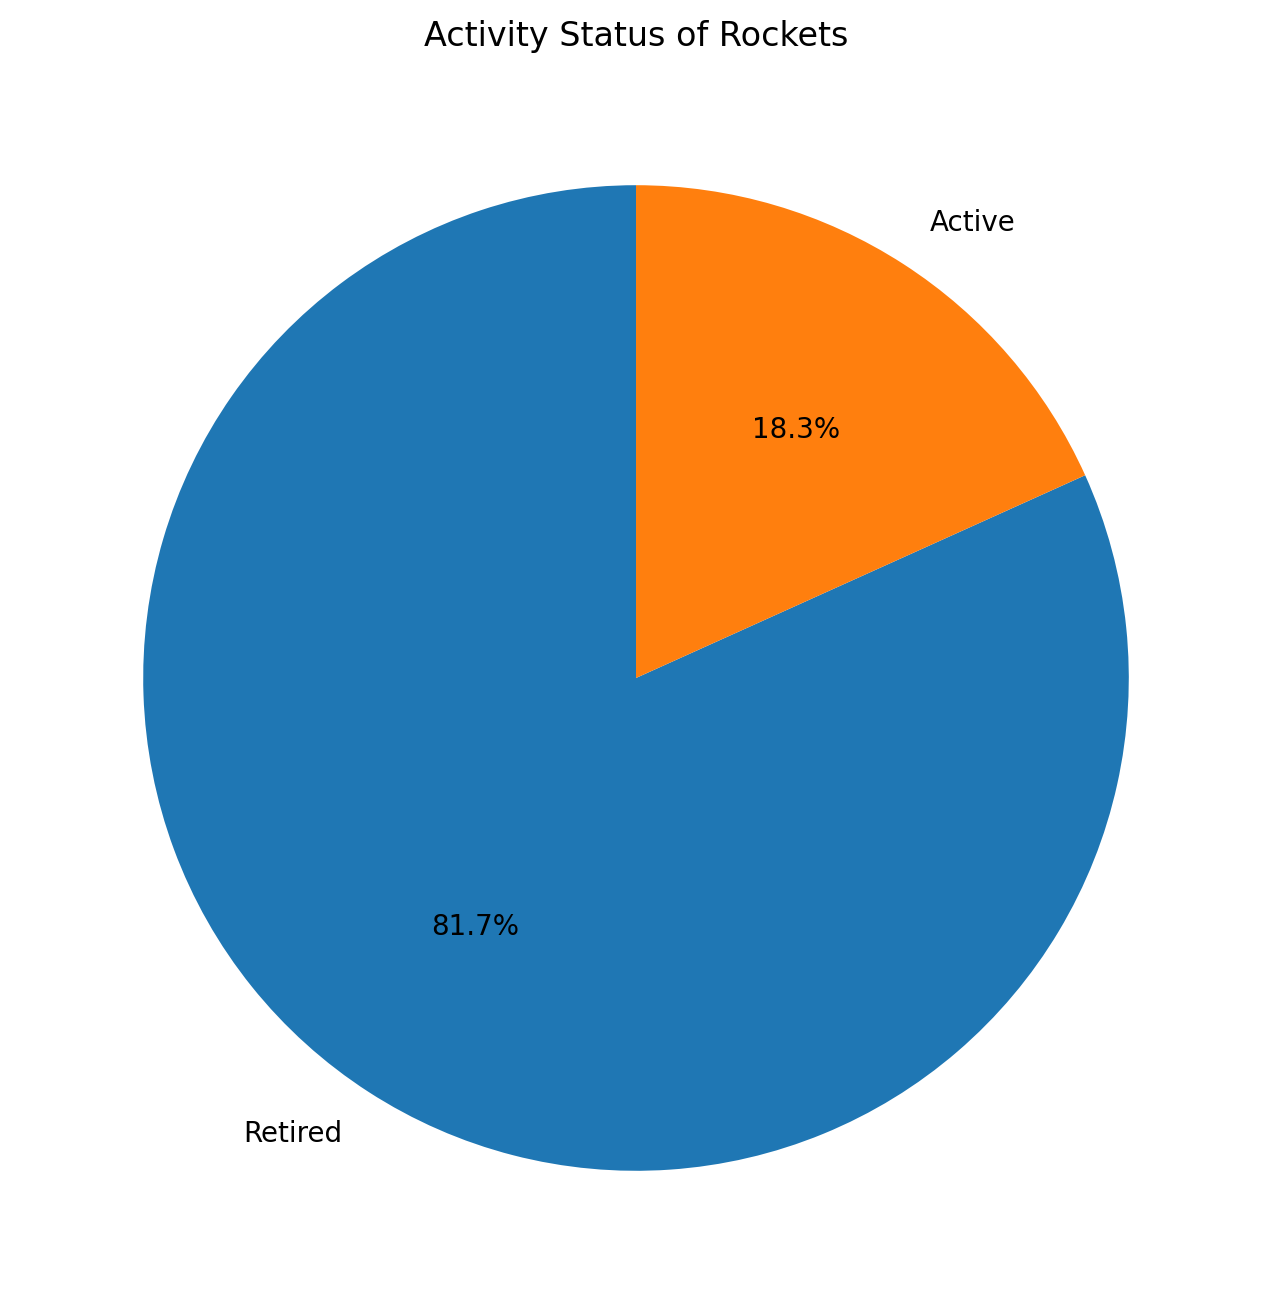

In [362]:
# Pie Chart
activity_counts = df_data["Rocket_Status"].value_counts()
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Activity Status of Rockets")
plt.pie(x=activity_counts.values, labels=activity_counts.index, autopct='%1.1f%%', startangle=90)

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [363]:
df_data["Mission_Status"].value_counts()

Mission_Status
Success              3878
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

We can see that 909 missions were successful, while 36 failed. In addition, 17 missions had a partial failure and 1 had a prelaunch failure.

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [364]:
# PLotly Dependency
%pip install --upgrade nbformat
%pip install ipykernel

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [365]:
# Convert price data to float
df_data["Price"] = df_data["Price"].str.replace(',', '')
df_data['Price'] = pd.to_numeric(df_data['Price'])

In [366]:
histogram = px.histogram(df_data, 
             x='Price', 
             title="Mission Price Distribution",
             nbins=50,)

histogram.update_layout(xaxis_title="Price (USD)", yaxis_title="Number of Missions")

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [367]:
# Country colunn
df_data["Country"] = df_data["Location"].str.split(",").str[-1]
df_data["Country"] = df_data["Country"].str.strip()
df_data["Country"].value_counts()

Country
Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              267
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: count, dtype: int64

In [368]:
# Clean country column
df_data["Country"].replace({"Russia" : "Russian Federation",
                            "Yellow Sea" : "China",
                            "Pacific Missile Range Facility" : "USA",
                            "Gran Canaria" : "USA"}, 
                            inplace=True)
df_data["Country"].value_counts()

Country
Russian Federation           1395
USA                          1347
Kazakhstan                    701
France                        303
China                         268
Japan                         126
India                          76
Pacific Ocean                  36
Iran                           13
New Zealand                    13
Israel                         11
Kenya                           9
Australia                       6
North Korea                     5
New Mexico                      4
South Korea                     3
Barents Sea                     3
Brazil                          3
Shahrud Missile Test Site       1
Name: count, dtype: int64

In [369]:
# Conversion function
def get_alpha_3(country_name):
    try:
        return countries.get(country_name).alpha3
    except KeyError:
        return None

In [370]:
country_counts = df_data["Country"].value_counts()
country_df = pd.DataFrame(country_counts)
country_df.reset_index(inplace=True)

In [371]:
# ISO Column
country_df["ISO"] = country_df["Country"].apply(get_alpha_3)

In [372]:
# World Choreopleth
fig = px.choropleth(country_df, 
                    locations="ISO",
                    color="count", 
                    hover_name="Country", 
                    color_continuous_scale='matter')

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [373]:
# Group data
failed_missions = df_data[df_data["Mission_Status"] != "Success"]
failures_per_country = failed_missions['Country'].value_counts()
failures_df = failures_per_country.reset_index()
failures_df.columns = ['Country', 'Failures']

In [374]:
# Add ISO column
failures_df["ISO"] = failures_df["Country"].apply(get_alpha_3)

In [375]:
# Plot failures
fig = px.choropleth(failures_df, 
                    locations="ISO",
                    color="Failures", 
                    hover_name="Country", 
                    color_continuous_scale='matter')

In [376]:
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [377]:
# Sunburst chart (Country, Organisation, Mission Status)
fig = px.sunburst(df_data,
                  path=['Country', 'Organisation', 'Mission_Status'],
                  color_continuous_scale='RdBu')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [378]:
# Total amount of money spent by organisation
df_data.groupby("Organisation").agg({"Price" : pd.Series.sum})

,Price
Organisation,
AEB,0.00
AMBA,0.00
ASI,0.00
Arianespace,"16,345.00"
Arm??e de l'Air,0.00
Blue Origin,0.00
Boeing,"1,241.00"
CASC,"6,310.51"
CASIC,0.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [379]:
# Amount of money spent by organisation per launch
df_data.groupby("Organisation").agg({"Price" : pd.Series.mean})

,Price
Organisation,
AEB,NaN
AMBA,NaN
ASI,NaN
Arianespace,170.26
Arm??e de l'Air,NaN
Blue Origin,NaN
Boeing,177.29
CASC,40.19
CASIC,NaN


# Chart the Number of Launches per Year

In [380]:
# Remove inconsistent dates
df_data["Date"] = pd.to_datetime(df_data["Date"], errors='coerce')
df_data.dropna(subset=["Date"], inplace=True)

In [381]:
# Add year column
df_data["Year"] = df_data["Date"].dt.year

In [382]:
# Group data by year
year_counts = df_data["Year"].value_counts()
year_counts.sort_values(inplace=True)

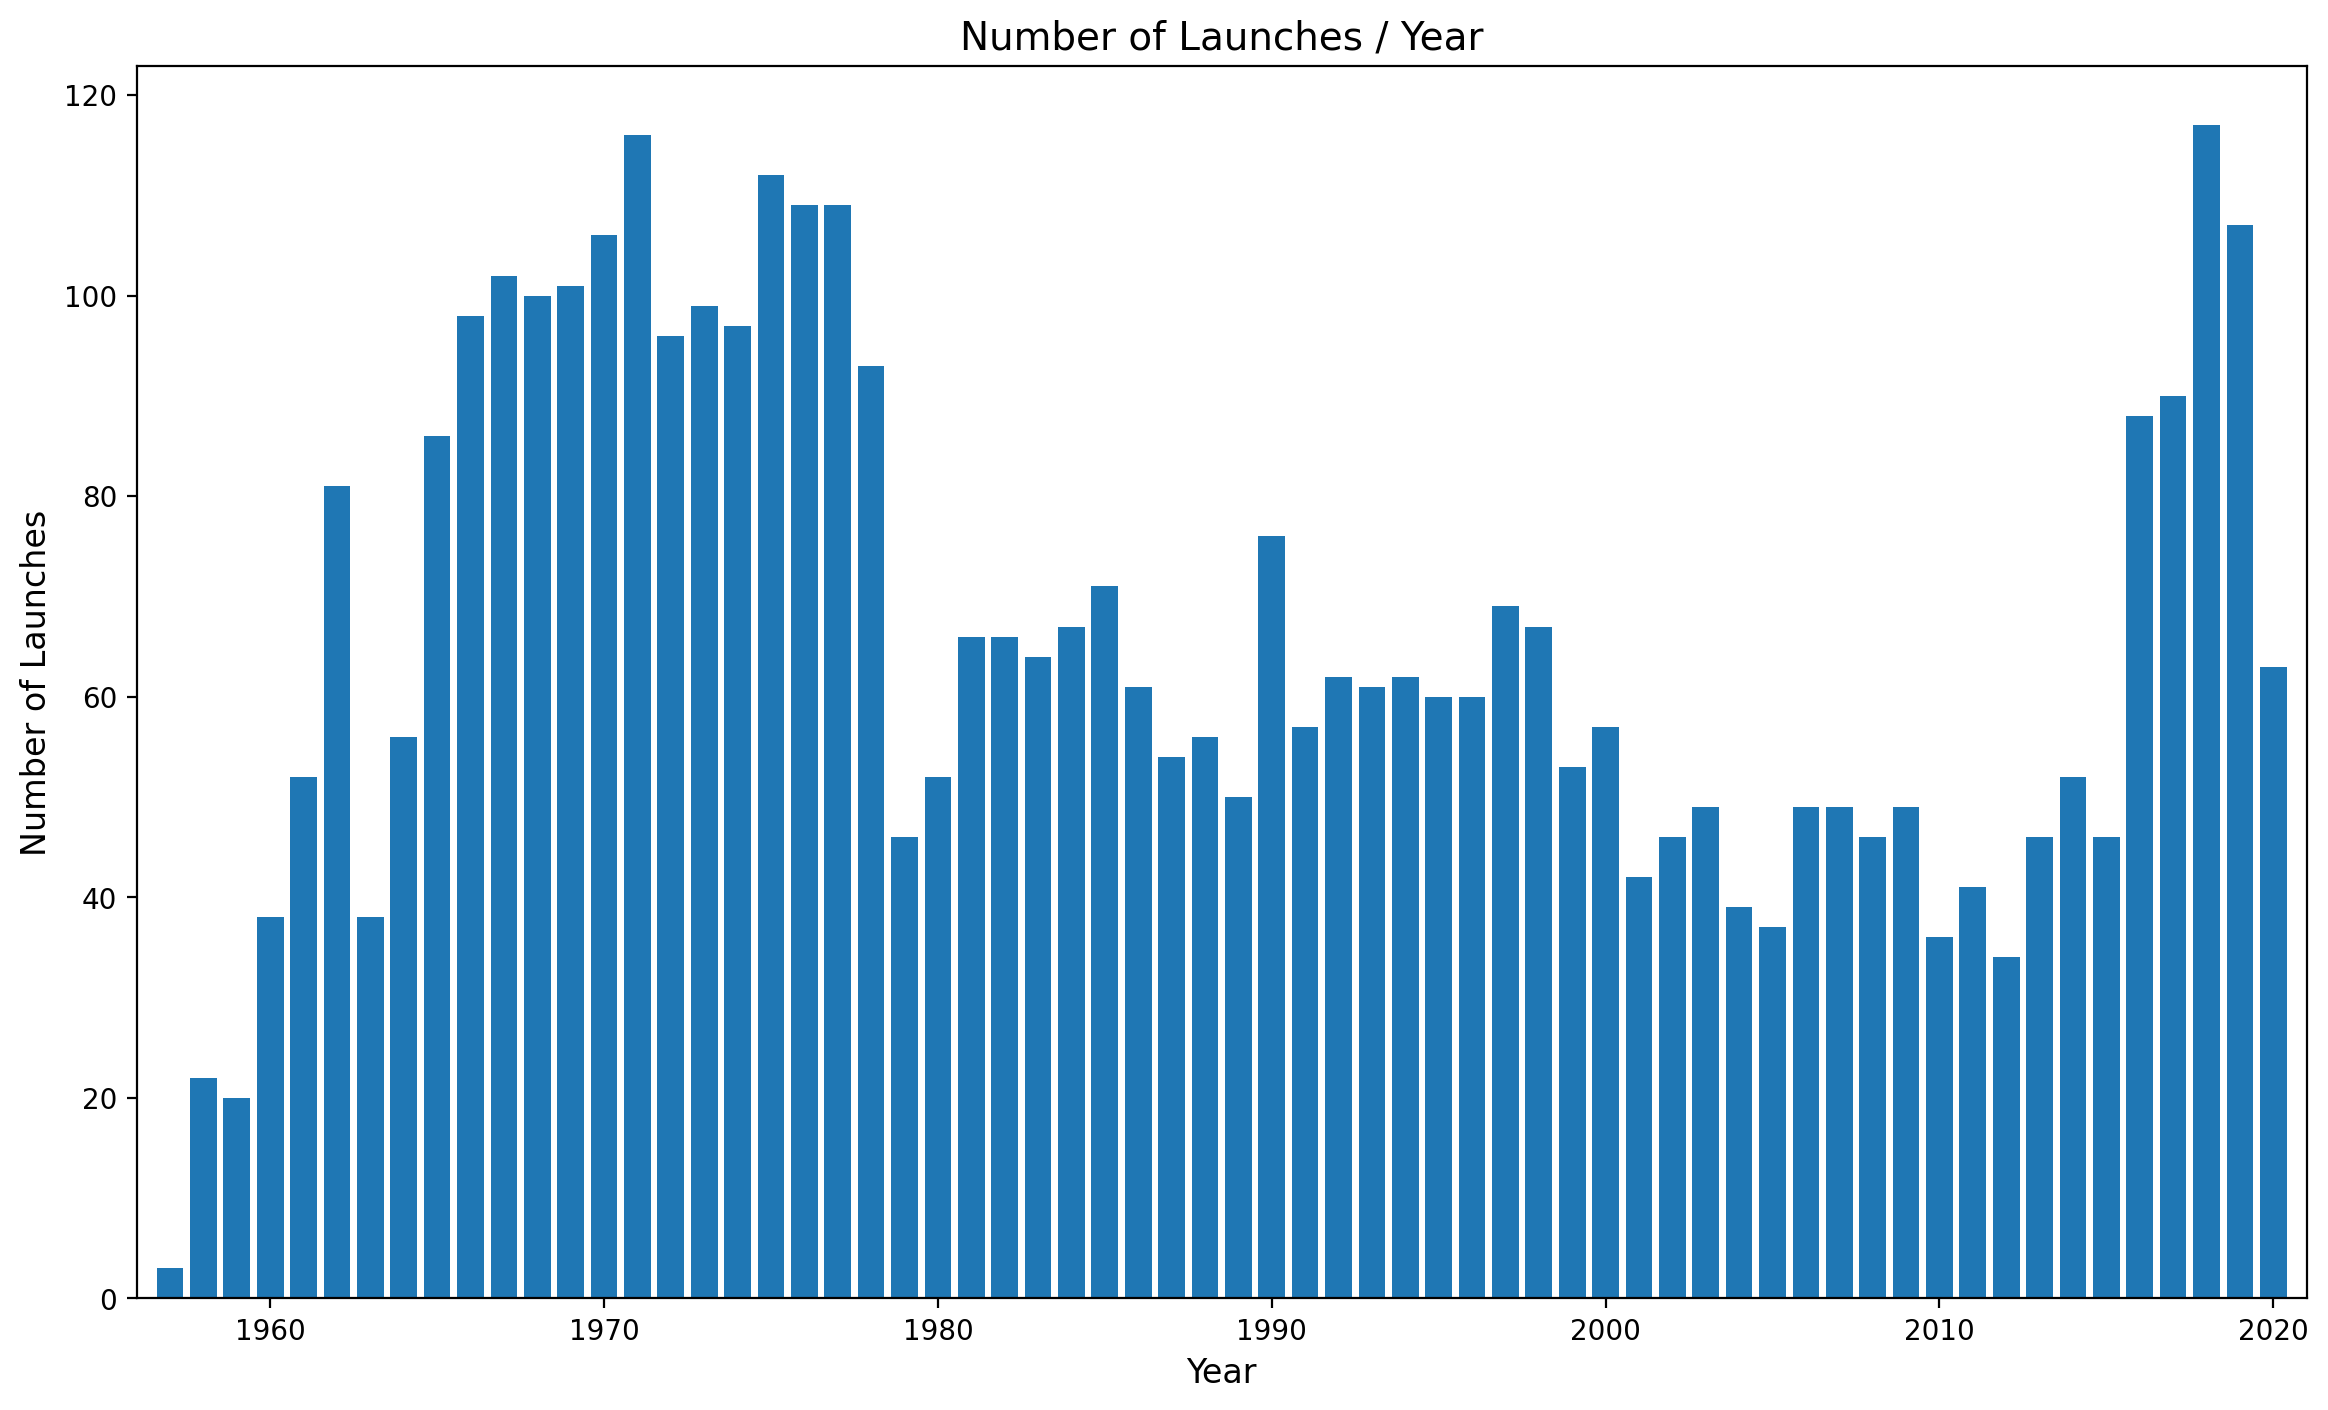

In [383]:
# Chart launches per year
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Number of Launches / Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.bar(x=year_counts.index, height=year_counts.values)
plt.xlim([year_counts.index.min() - 1, year_counts.index.max() + 1])
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [385]:
# Transform data
# df_data.set_index("Date", inplace=True)
monthly_launches = df_data.resample('M').size()

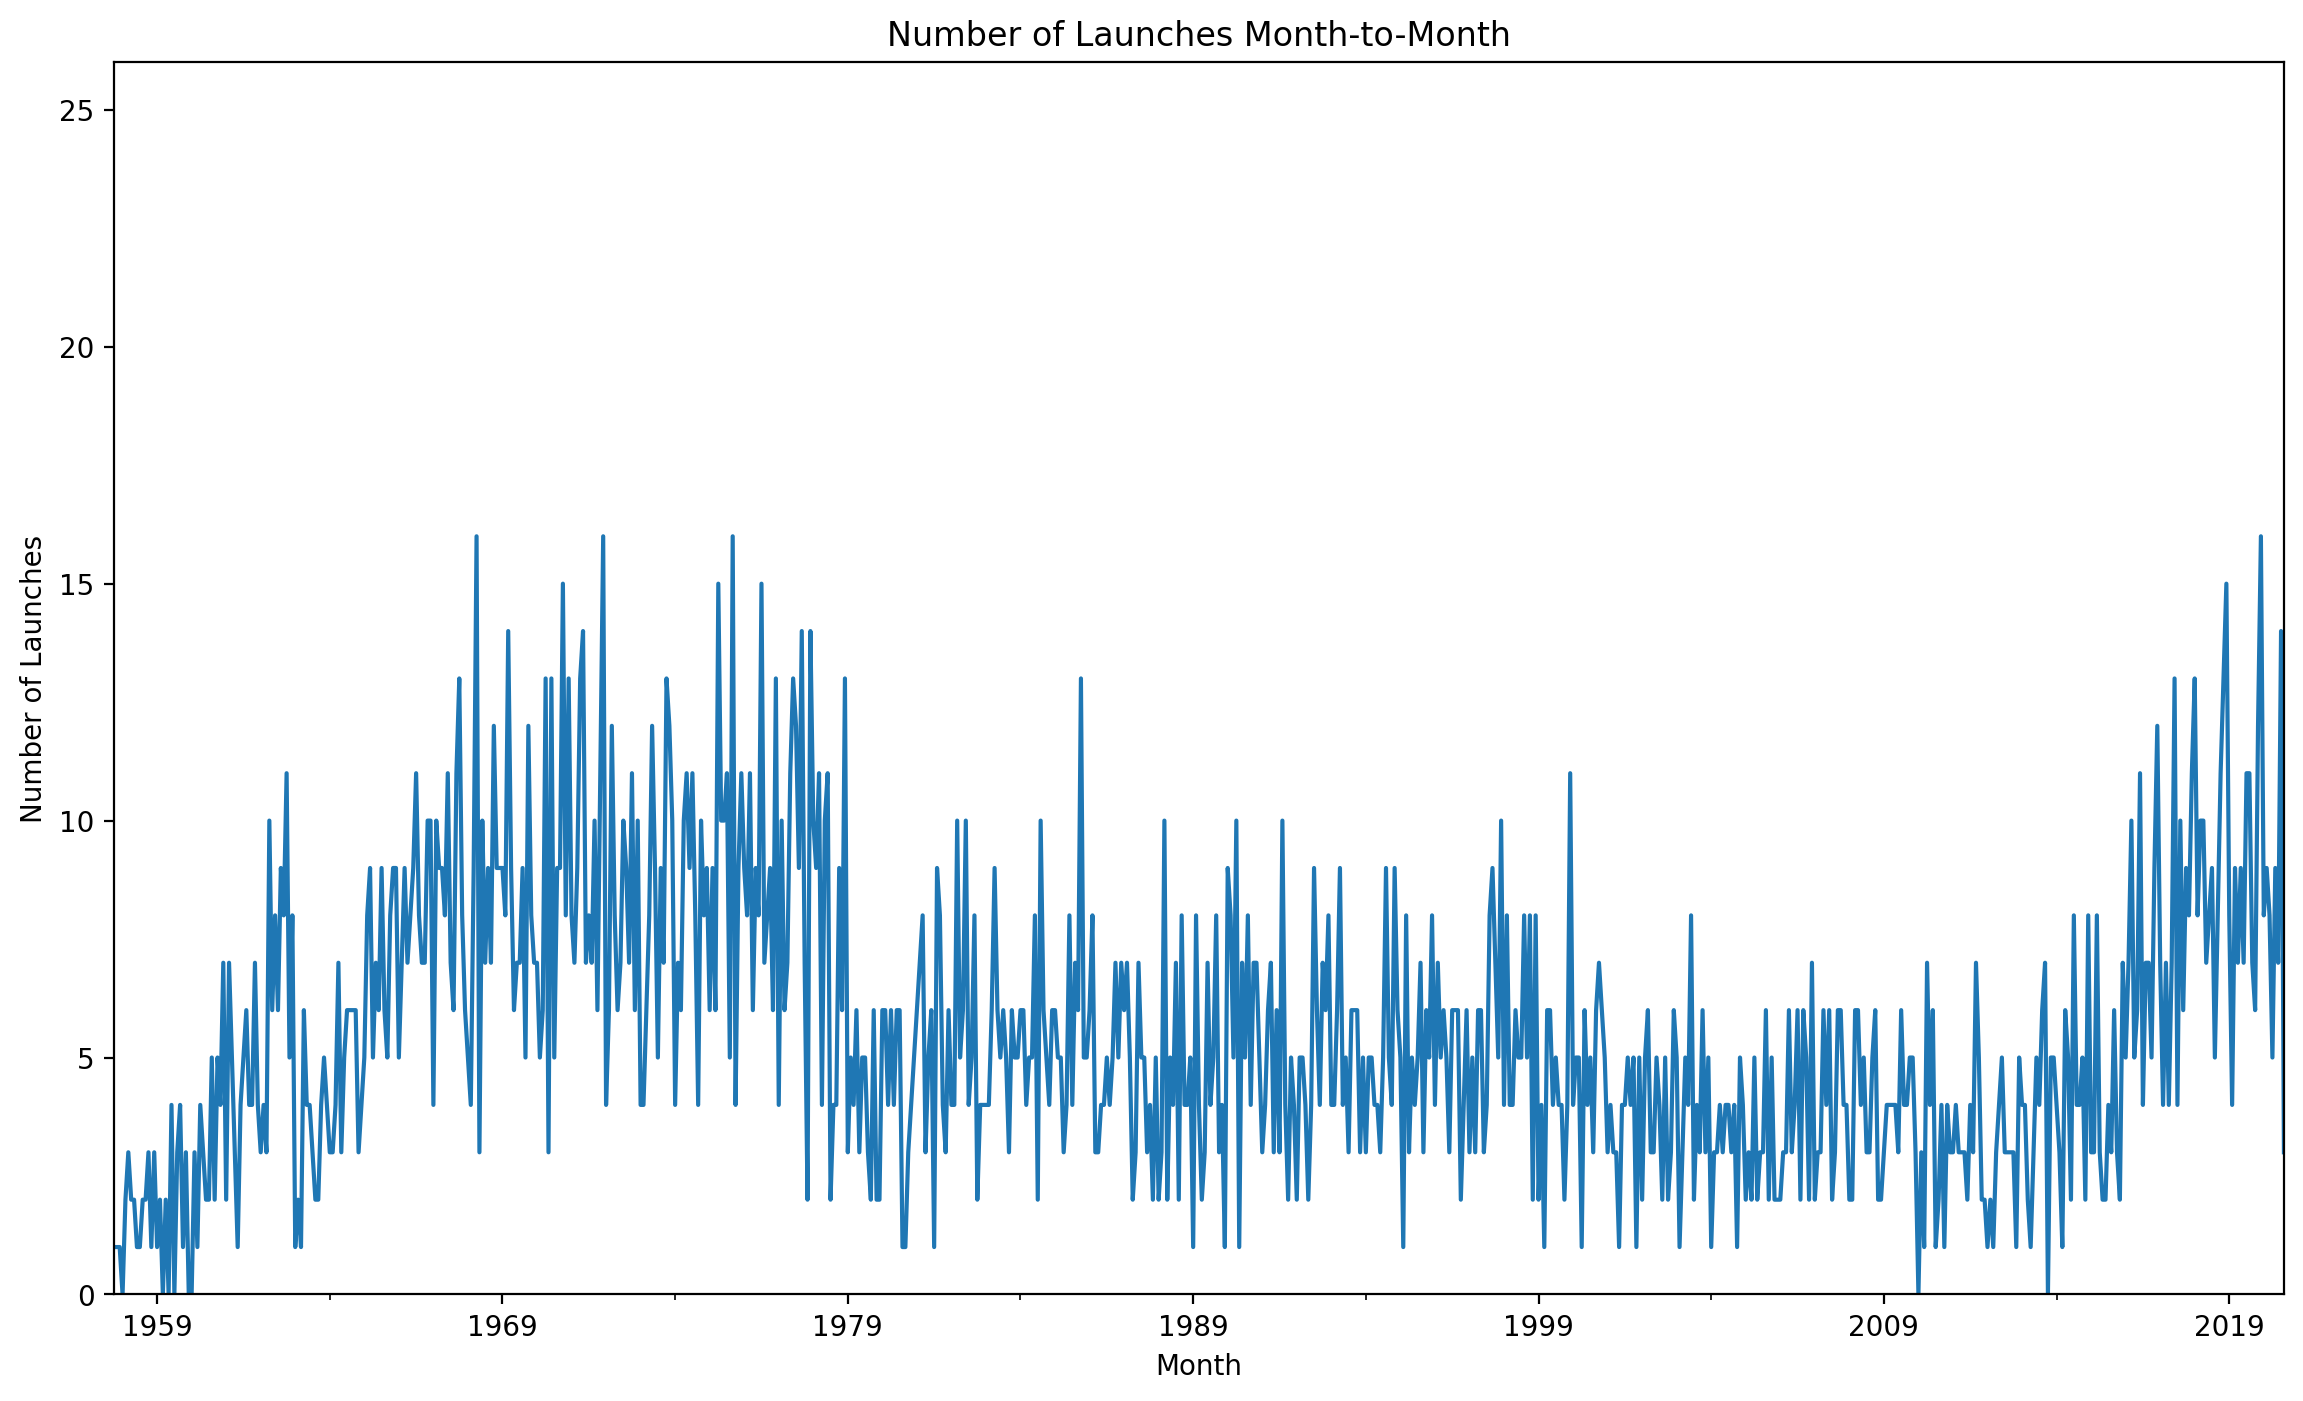

In [386]:
# Plot launches month-to-month
plt.figure(figsize=(14, 8), dpi=200)
monthly_launches.plot(kind='line')
plt.title('Number of Launches Month-to-Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.ylim([0, monthly_launches.max() + 10])
plt.show()

In [387]:
# Month with the most launhces
maximum_launches = monthly_launches.max()
monthly_launches[monthly_launches == maximum_launches]
# The months with the most launches are April 1968, December 1971, September 1975 and December 2019

Date
1968-04-30 00:00:00+00:00    16
1971-12-31 00:00:00+00:00    16
1975-09-30 00:00:00+00:00    16
2019-12-31 00:00:00+00:00    16
dtype: int64

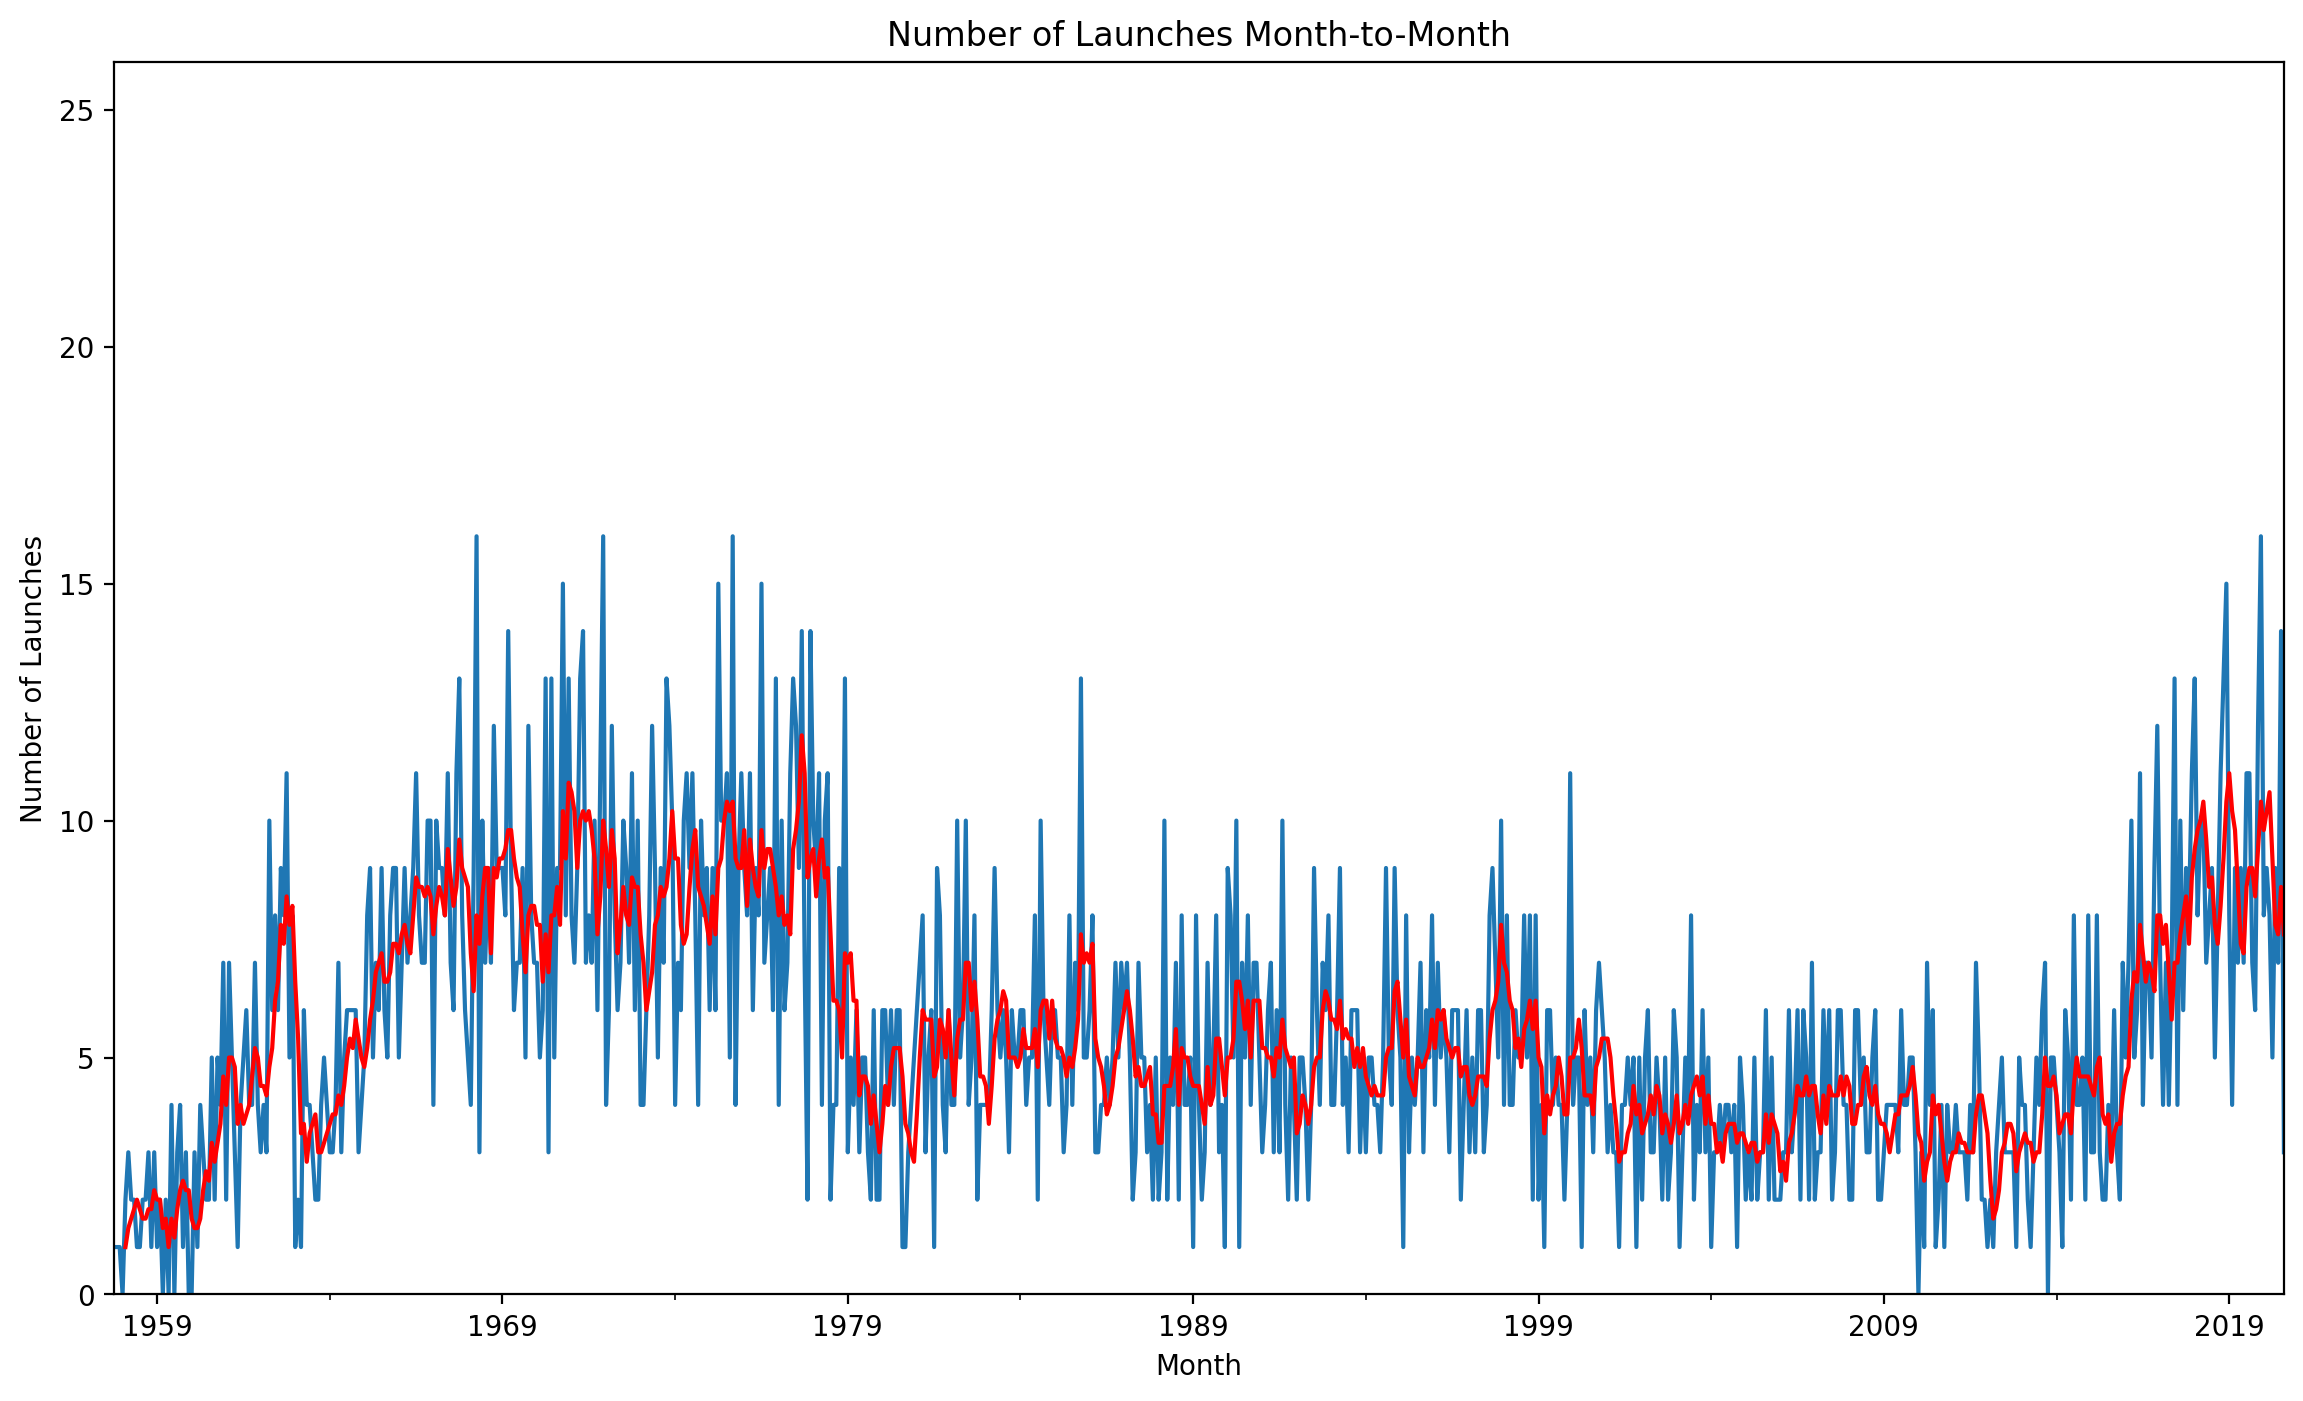

In [389]:
# Rolling average
rolling_average = monthly_launches.rolling(window=5).mean()

plt.figure(figsize=(14, 8), dpi=200)

# Plot rolling average and monthly launches
monthly_launches.plot(kind='line')
rolling_average.plot(kind='line', color='red')

# Plot setup
plt.title('Number of Launches Month-to-Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.ylim([0, monthly_launches.max() + 10])
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [392]:
# Launches per month
df_data.reset_index(inplace=True)
df_data['Month'] = df_data['Date'].dt.month
month_counts = df_data["Month"].value_counts()

In [393]:
month_counts.sort_values(inplace=True)

In [394]:
# Dictionary mapping numbers to month names
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Replace numbers with month names
month_counts.index = month_counts.index.map(month_dict)

In [395]:
month_counts 

Month
January      265
May          320
February     323
November     324
July         347
March        349
September    354
August       358
April        366
October      375
June         386
December     430
Name: count, dtype: int64

The most popular months for launches tend to be December, June and October. While the least popular ones tend to be February, January and May.

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [398]:
# Calculate average price over time
df_data_clean = df_data.dropna()
average_price = df_data_clean.groupby("Year").agg({"Price" : pd.Series.mean})

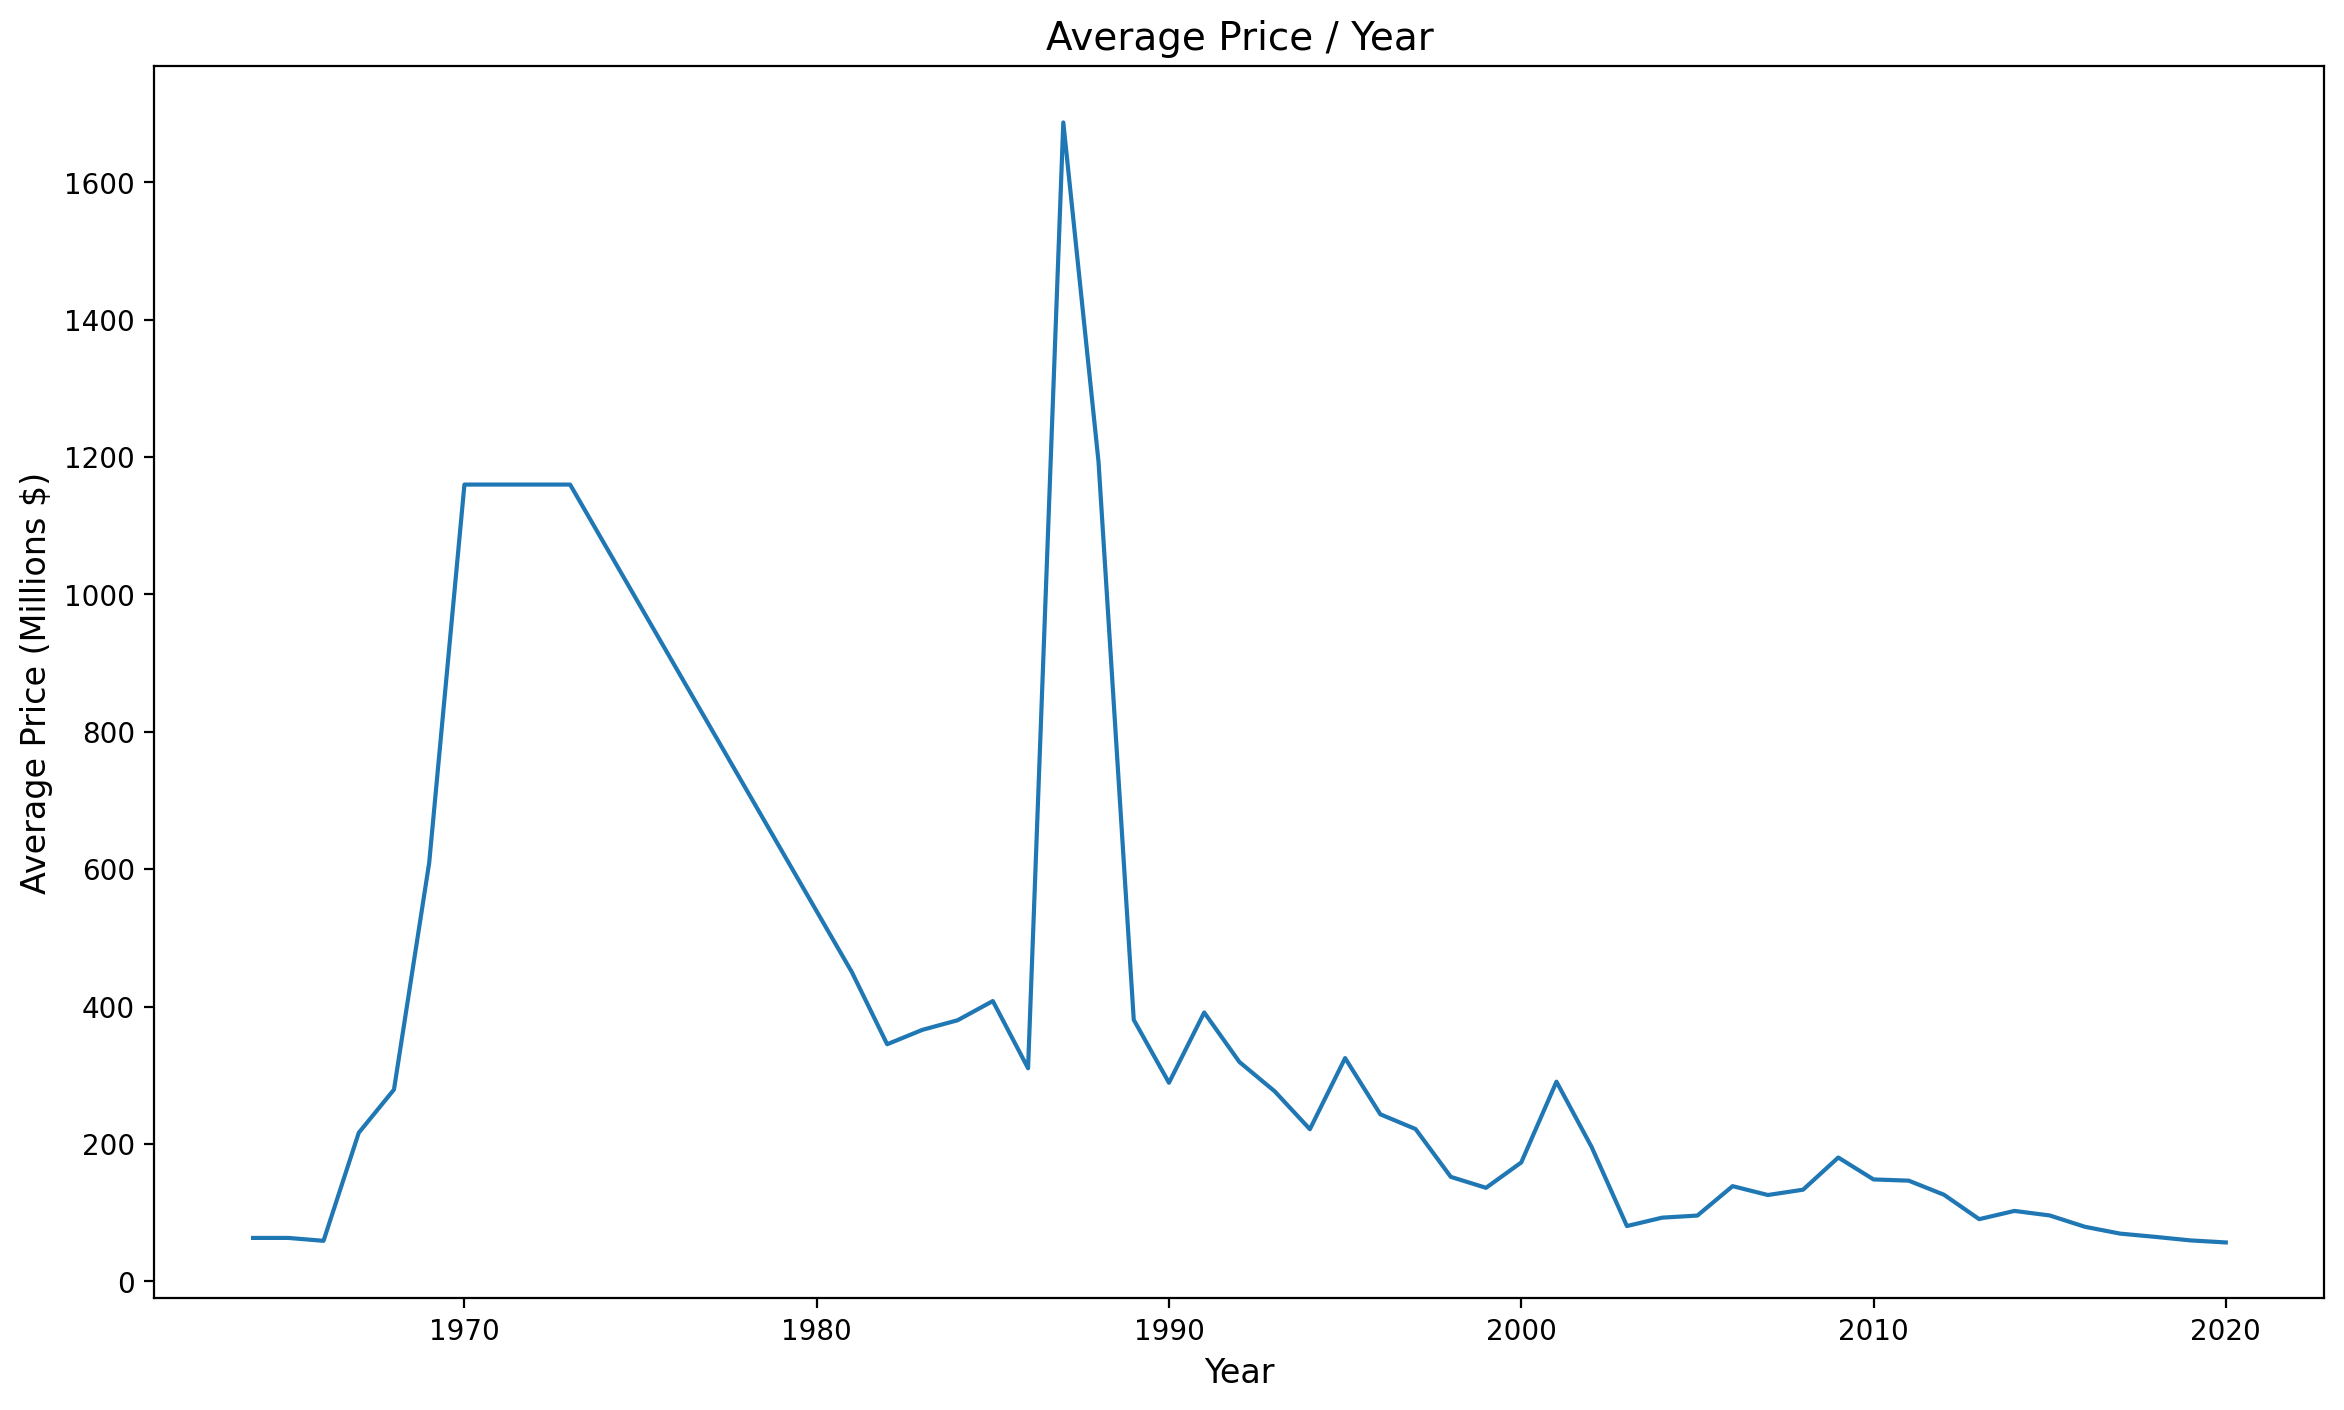

In [399]:
# Plot average price over time
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Average Price / Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price (Millions $)", fontsize=12)
plt.plot(average_price.index, average_price.values)
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [400]:
# Find Top 10 Organisations
org_count = df_data["Organisation"].value_counts()
top_10 = org_count[:10].index
df_top_10 = df_data[df_data["Organisation"].isin(top_10)]

In [405]:
# Group data by year
org_year_data = df_top_10.groupby(["Organisation", "Year"]).count()
org_year_data.rename(columns={"Date" : "Count"}, inplace=True)
org_year_data.drop(columns=["Location", "Detail", "Rocket_Status", "Price", "Mission_Status", "Country", "Month", "index"], inplace=True)

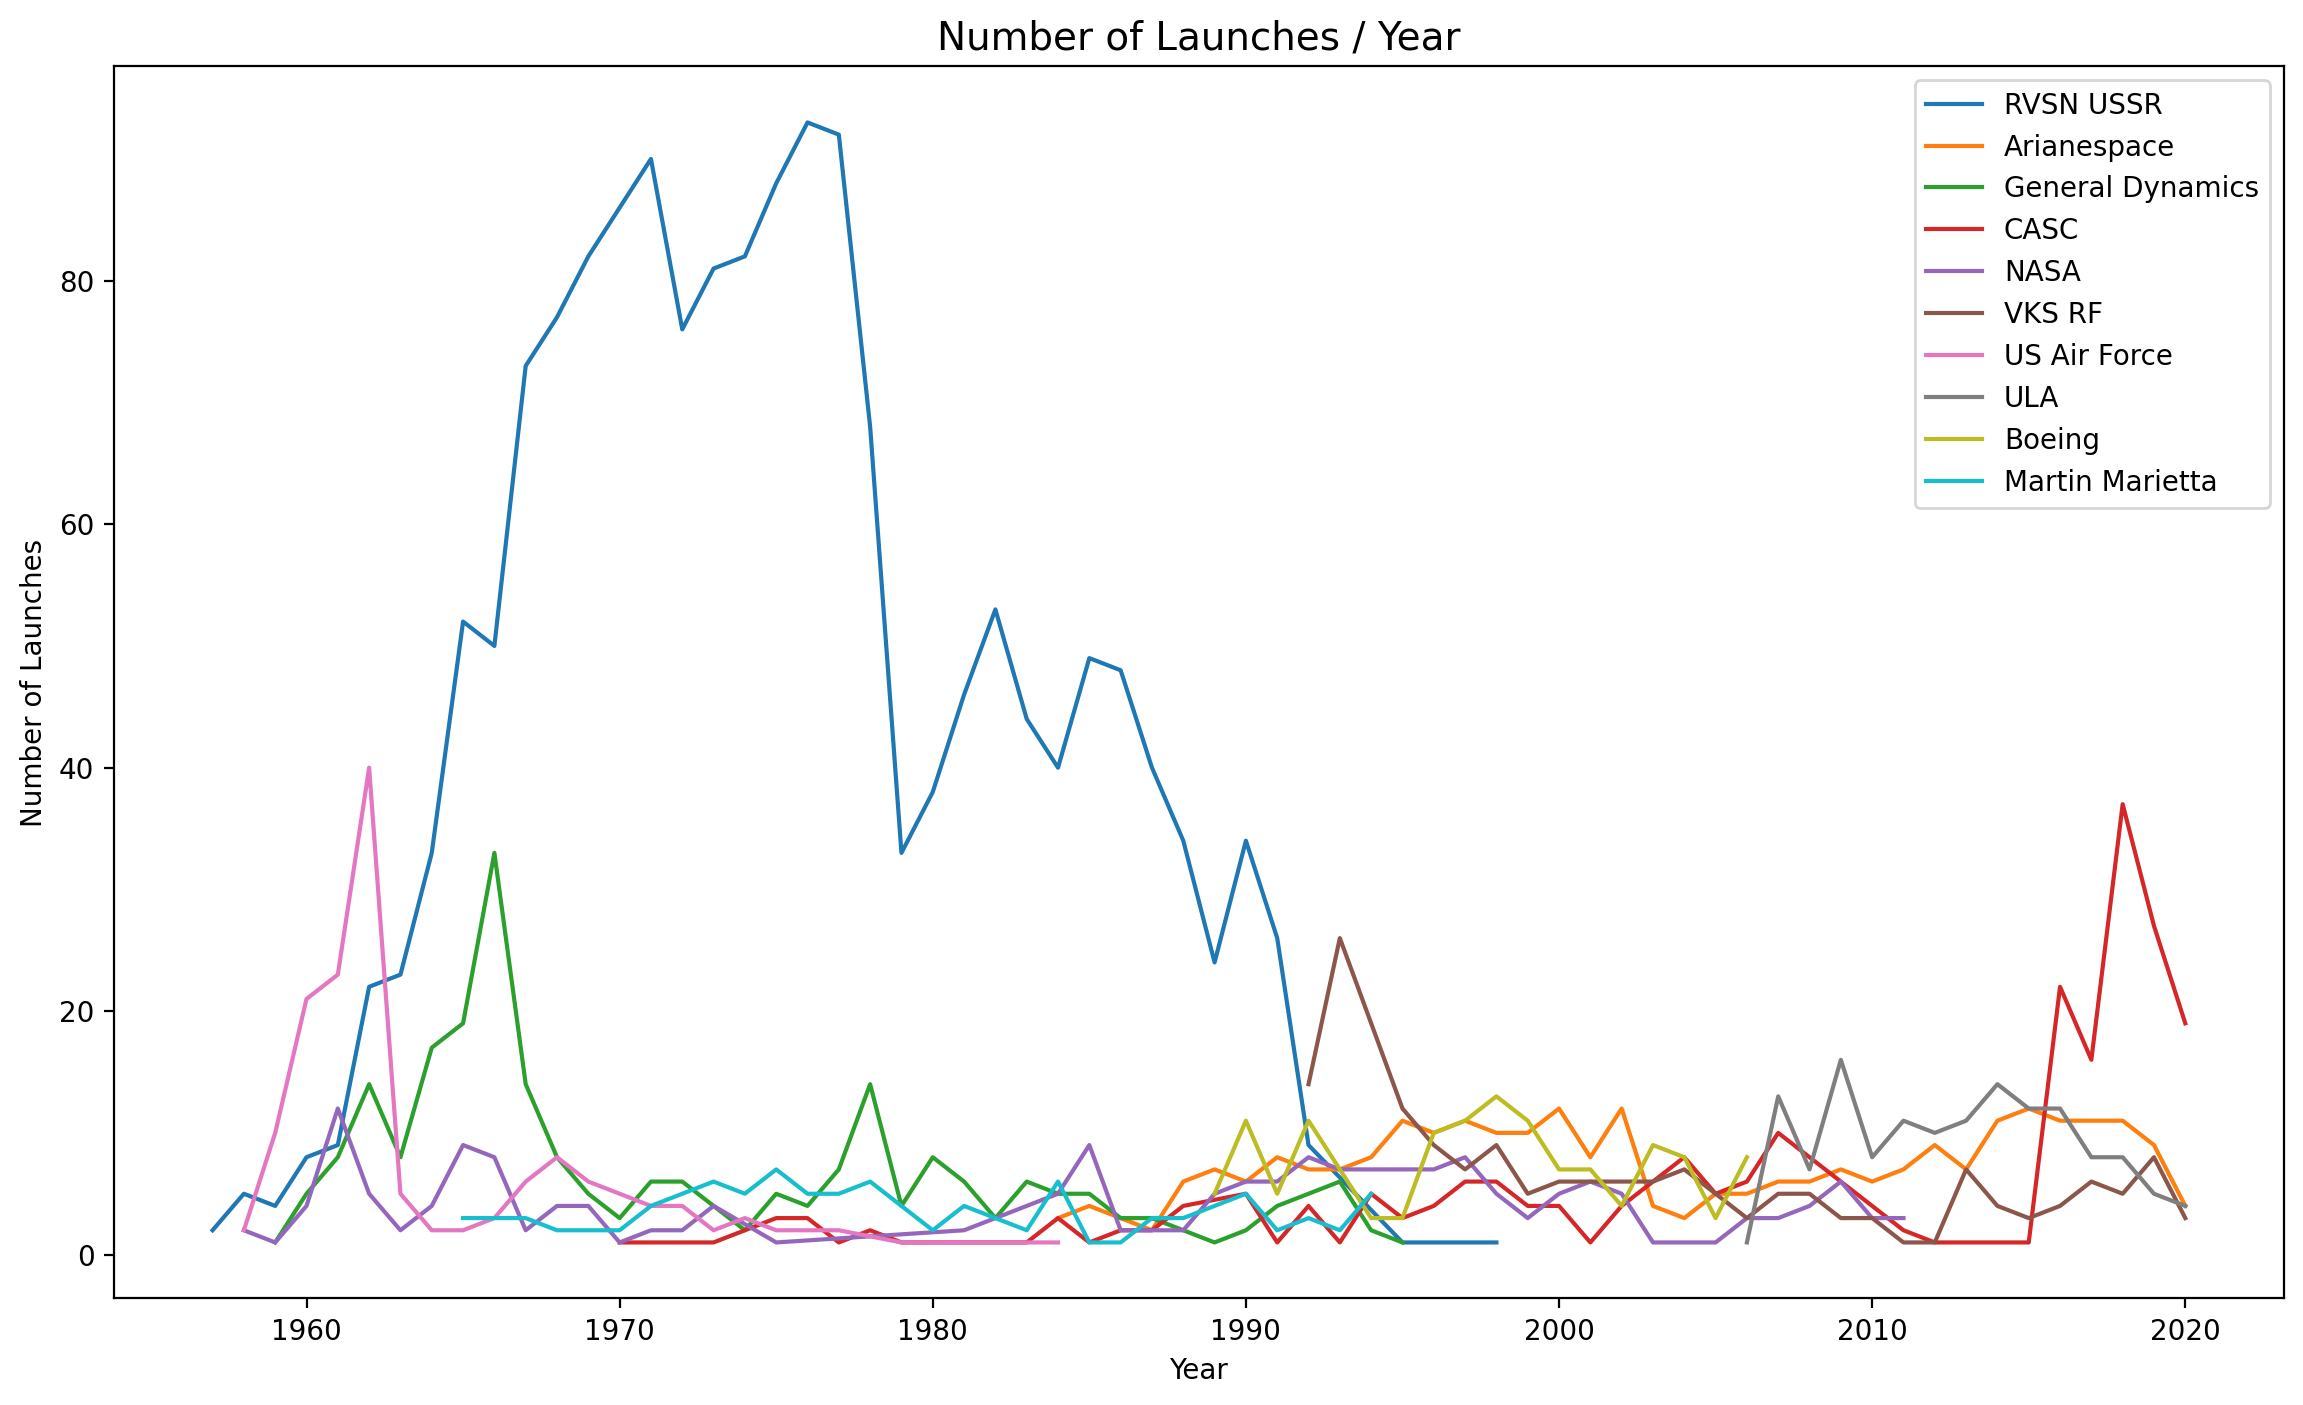

In [406]:
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Number of Launches / Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Launches")

for org in top_10:
    org_data = org_year_data.loc[org]
    plt.plot(org_data.index, org_data.values, label=org)

plt.legend()
plt.show()

In the beginning of space exploration, the US Air Force was dominating the secne. In the early 1960s RSVN USSR took over and was the leader up until the USSR collapsed. The period between 2000 and 2010 was split between Arianspace and Boeing, and in the 2010s, ULA was the leader, while in the mid 2010s up until now, CASC is the global leader.

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [430]:
df_cold_war = df_data[(df_data["Year"] >= 1947) & (df_data["Year"] <= 1991)]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [431]:
# Get data
country_counts = df_cold_war["Country"].value_counts()
russia = country_counts["Russian Federation"] + country_counts["Kazakhstan"]
usa = country_counts["USA"] 

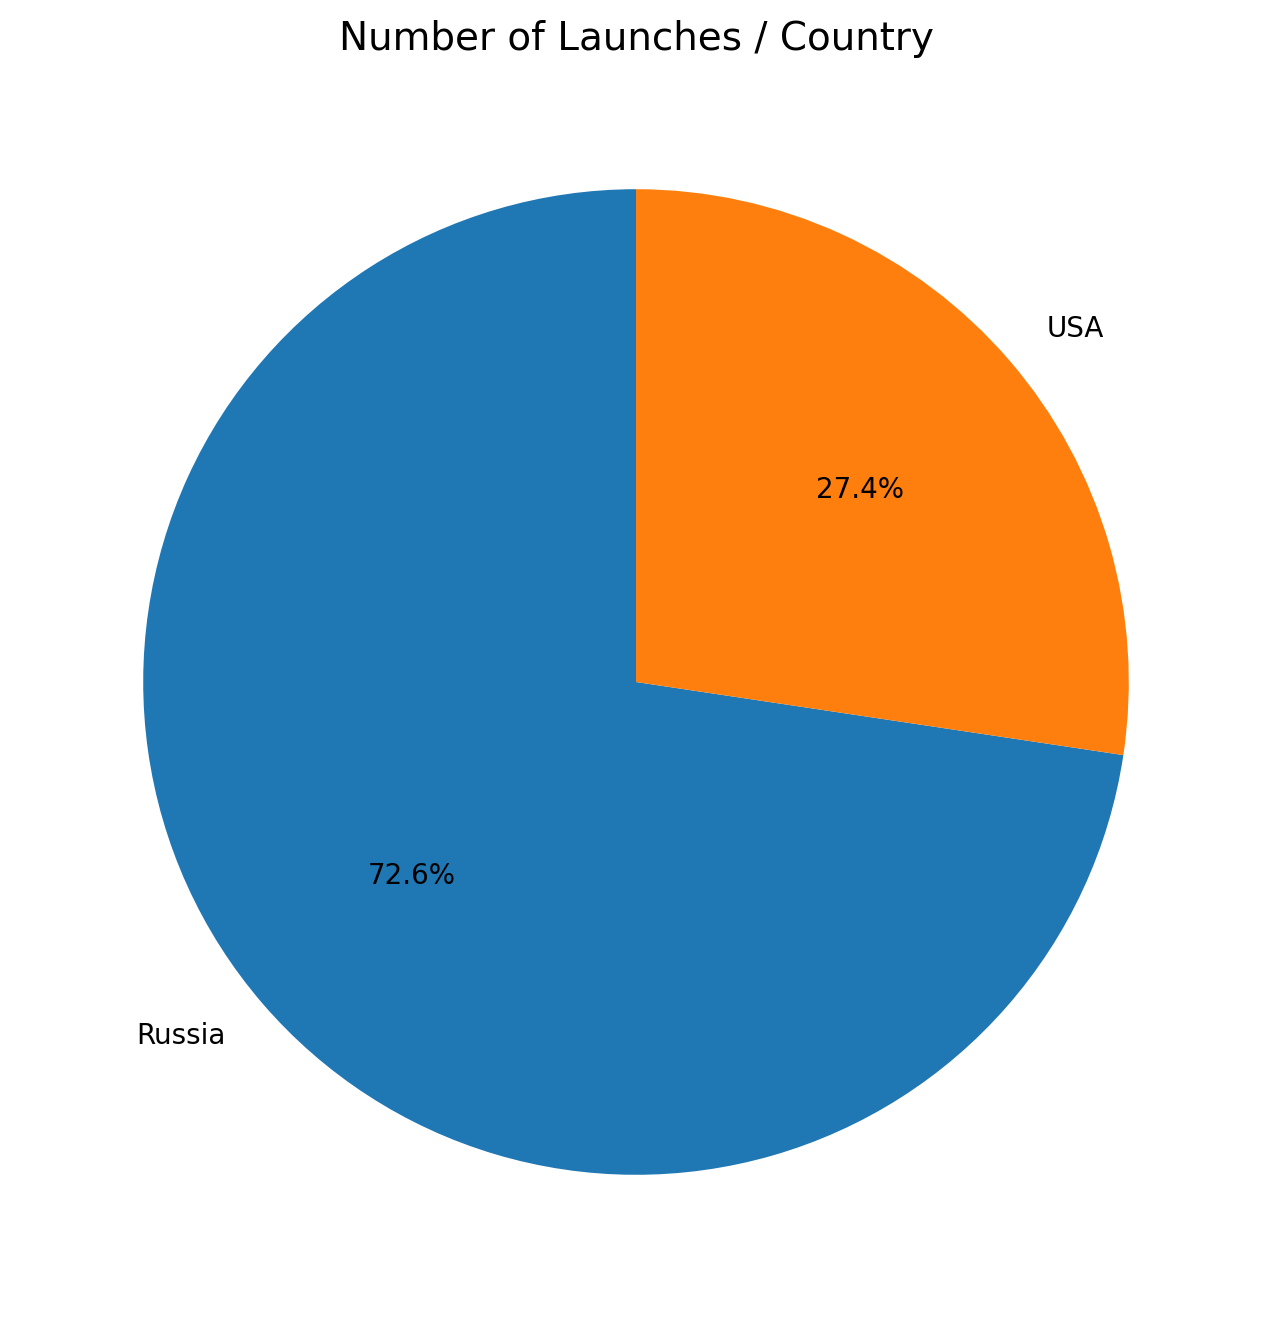

In [432]:
# Plot data
plt.figure(figsize=(14, 8), dpi=200)
plt.title("Number of Launches / Country", fontsize=14)
plt.pie(x=[russia, usa], labels=["Russia", "USA"], autopct='%1.1f%%', startangle=90)
plt.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [433]:
# Filter data
df_cold_war = df_cold_war[df_cold_war["Country"].isin(["Russian Federation", "USA", "Kazakhstan"])]
df_cold_war["Country"].replace({"Russian Federation" : "USSR"}, inplace=True)
df_cold_war["Country"].replace({"Kazakhstan" : "USSR"}, inplace=True)

In [434]:
launches_per_year = df_cold_war.groupby(["Country", "Year"]).count()
launches_per_year.rename(columns={"Date" : "Count"}, inplace=True)
launches_per_year.drop(columns=["Location", "Detail", "Rocket_Status", "Price", "Mission_Status", "Month", "index", "Organisation"], inplace=True)
launches_per_year.reset_index(inplace=True)

In [435]:
px.bar(launches_per_year, x="Year", y="Count", color="Country", barmode="group")

## Chart the Total Number of Mission Failures Year on Year.

In [436]:
failed_missions = df_cold_war[df_cold_war["Mission_Status"] != "Success"]

In [439]:
failures_per_year = failed_missions.groupby(["Country", "Year"]).count()
failures_per_year.rename(columns={"Date" : "Count"}, inplace=True)
failures_per_year.drop(columns=["Location", "Detail", "Rocket_Status", "Price", "Mission_Status", "Month", "index", "Organisation"], inplace=True)
failures_per_year.reset_index(inplace=True)

In [443]:
px.bar(failures_per_year, x="Year", y="Count", color="Country", barmode="group", title="Number of Failed Missions / Year")

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [473]:
# Calculate the number of failures
failures = df_cold_war[df_cold_war['Mission_Status'].isin(['Failure', 'Partial Failure', 'Prelaunch Failure'])]
failures_count = failures.groupby(['Country', 'Year']).size()

# Calculate the total number of missions
total_missions = df_cold_war.groupby(['Country', 'Year']).size()

# Calculate the failure percentage
failures_percentage = failures_count / total_missions

# Convert the result to a DataFrame
failures_percentage = failures_percentage.reset_index(name='Failure Percentage')


,Country,Year,Failure Percentage
0,USA,1957,1.00
1,USA,1958,0.71
2,USA,1959,0.62
3,USA,1960,0.47
4,USA,1961,0.37
...,...,...,...
65,USSR,1987,0.03
66,USSR,1988,NaN
67,USSR,1989,0.04
68,USSR,1990,0.06


In [474]:
px.bar(failures_percentage, x="Year", y="Failure Percentage", color="Country", barmode="group", title="Failure % / Year")

Overall, the failure percentage has been going down over the years, since both countries have gotten better at preventing them.


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [484]:
# Clean up data
df_data["Country"].replace({"Kazakhstan" : "Russian Federation",
                            "Pacific Ocean" : "USA",
                            "New Mexico" : "USA", 
                            "Barents Sea" : "Russian Federation",
                            "Shahrud Missile Test Site" : "Iran"}, inplace=True)

Country
Russian Federation    2033
USA                   1359
France                 303
China                  264
Japan                  122
India                   75
New Zealand             13
Kenya                    9
North Korea              5
Australia                5
Iran                     3
South Korea              3
Israel                   2
Brazil                   1
Name: count, dtype: int64

In [517]:
launches_per_year_per_country = df_data.groupby(["Year", "Country"]).size()
launches_per_year_per_country = launches_per_year_per_country.reset_index(name="Count")

pivot_data = launches_per_year_per_country.pivot(index='Year', columns='Country', values='Count').fillna(0)
max_country_per_year = pivot_data.idxmax(axis=1)

bar_chart = px.bar(x=pivot_data.index, 
       y=pivot_data.max(axis=1), 
       color=max_country_per_year.values, 
       title="Country with the most launches / Year")

bar_chart.update_yaxes(title="Number of Launches")
bar_chart.update_xaxes(title="Year")
bar_chart.update_layout(legend_title_text="Country")
bar_chart.show()

In [518]:
successful_launches = df_data[df_data["Mission_Status"] == "Success"]
launches_per_year_per_country = successful_launches.groupby(["Year", "Country"]).size()
launches_per_year_per_country = launches_per_year_per_country.reset_index(name="Count")

pivot_data = launches_per_year_per_country.pivot(index='Year', columns='Country', values='Count').fillna(0)
max_country_per_year = pivot_data.idxmax(axis=1)

bar_chart = px.bar(x=pivot_data.index, 
       y=pivot_data.max(axis=1), 
       color=max_country_per_year.values, 
       title="Country with the most launches / Year")

bar_chart.update_yaxes(title="Number of Launches")
bar_chart.update_xaxes(title="Year")
bar_chart.update_layout(legend_title_text="Country")
bar_chart.show()

The results are fairly similar when we look at successful launches only.


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [519]:
launches_per_year_per_org = df_data.groupby(["Year", "Organisation"]).size()
launches_per_year_per_org = launches_per_year_per_org.reset_index(name="Count")

pivot_data = launches_per_year_per_org.pivot(index='Year', columns='Organisation', values='Count').fillna(0)
max_org_per_year = pivot_data.idxmax(axis=1)

bar_chart = px.bar(x=pivot_data.index, 
       y=pivot_data.max(axis=1), 
       color=max_org_per_year.values, 
       title="Organisation with the most launches / Year")

bar_chart.update_yaxes(title="Number of Launches")
bar_chart.update_xaxes(title="Year")
bar_chart.update_layout(legend_title_text="Organisation")
bar_chart.show()

In the 1970s and 1980s, RVSN USSR was the dominant organisation. In 2018-2020, CASC was the dominant organisation.